# Titanic Dataset Visualization

This notebook demonstrates various visualizations on the Titanic dataset using **Seaborn** and **Matplotlib**.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Display first few rows
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Dataset Overview

In [2]:
titanic.info()
titanic.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
r=titanic['age'].max()-titanic['age'].min()
r/10

7.958

## 📊 Seaborn Visualizations

###  Histogram 
A histogram is a graphical representation of the distribution of numerical data. It divides the data into intervals called bins, and the height of each bin represents the frequency (or count) of data points within that interval.
### Distribution of Age (Histogram + KDE)
Shows how passenger ages are distributed.  
sns.hishistplot()

<Axes: xlabel='age', ylabel='Count'>

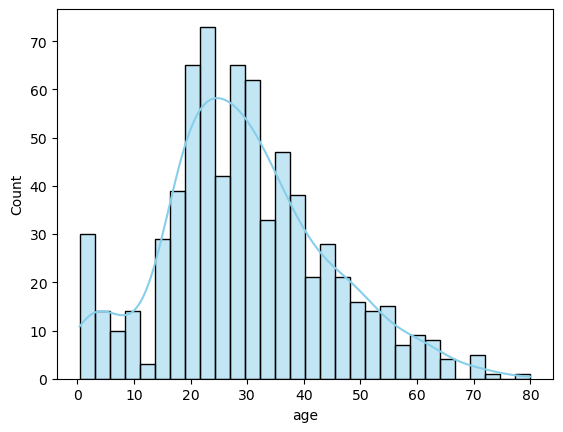

In [117]:
sns.histplot(titanic["age"], kde=True, bins=30, color="skyblue")


###  Count plot 
Count plot is a type of bar chart used to show the number of occurrences (frequency) of each category in a dataset. 
Useful for categorical data (like gender, class, species).Each bar represents a category, and its height = number of observations in that category.

### Count of Passengers by Class


<Axes: xlabel='class', ylabel='count'>

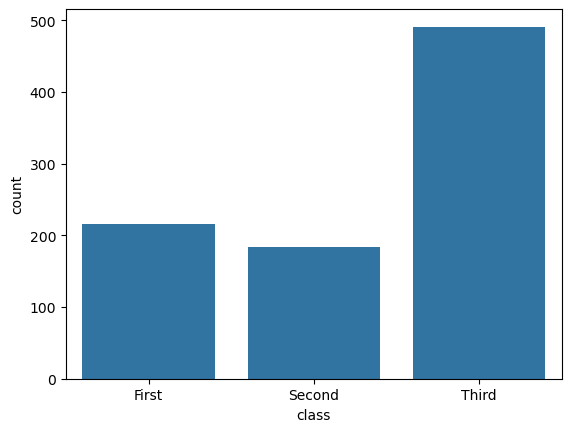

In [23]:
sns.countplot(data=titanic,x='class')

### Survival Rate by Gender
A bar plot is used to visualize numerical summaries (like mean, sum) for categorical data. 
estimator=np.sum   # <-- Use sum instead of mean


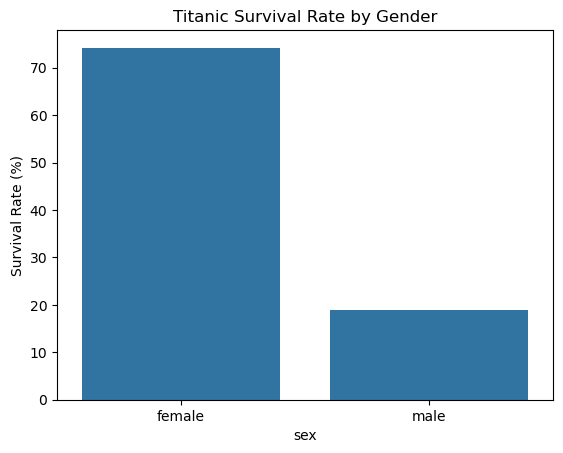

In [57]:
survival_rate = (titanic.groupby('sex')['survived'].mean().reset_index())
survival_rate['survival_rate'] = survival_rate['survived'] * 100
sns.barplot(data=survival_rate, x='sex', y='survival_rate')
plt.ylabel("Survival Rate (%)")
plt.title("Titanic Survival Rate by Gender")
plt.show()

### Boxplot of Age by Class
A box plot is a visualization that shows the distribution, spread, and outliers of a dataset using the five-number summary (minimum, Q1, median, Q3, maximum).
[![Untitled-2.webp](https://i.postimg.cc/FzLqYcDt/Untitled-2.webp)](https://postimg.cc/vxGXj4JX)


<Axes: xlabel='age'>

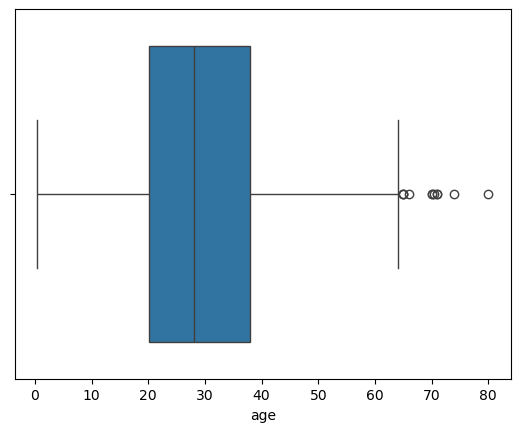

In [59]:
sns.boxplot(data=titanic,x='age')

### Scatter Plot
A scatter plot is a type of data visualization that displays the relationship between two numerical variables using points (dots) on a Cartesian coordinate system.

### Patterns & Relationships
Scatter plots reveal trends, correlations, or clusters.
The direction of the pattern (upward, downward, or random) shows whether variables are positively correlated, negatively correlated, or uncorrelated.
### Types of Relationships in Scatter Plots
Positive correlation – as 𝑥 increases, y also increases.
Negative correlation – as x increases,y decreases.
No correlation – no visible relationship between 𝑥 and y.


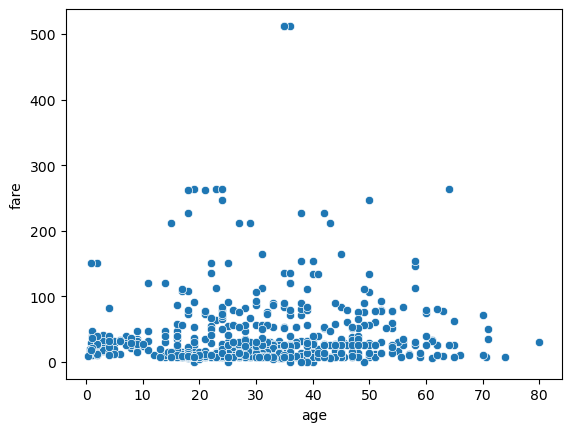

Correlation: 0.09606669176903887


In [71]:
sns.scatterplot(data=titanic,x='age',y='fare')
plt.show()
print('Correlation:',titanic['age'].corr(titanic['fare']))

### Line plotabs
A line plot is great for showing trends or changes in a numerical variable across categories or time
sns.lineplot(x="class", y="age", data=titanic, estimator="mean", marker="o")

<Axes: xlabel='class', ylabel='age'>

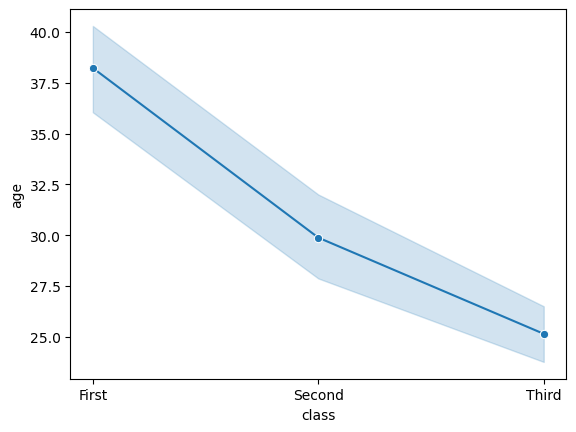

In [73]:
sns.lineplot(x="class", y="age", data=titanic, estimator="mean", marker="o")

### Violin Plot of Age by Gender & Class
A Violin Plot is a statistical graph that combines the features of a box plot and a kernel density plot. It is used to visualize the distribution, probability density, and summary statistics of a dataset.
sns.violinplot(x="class", y="age", hue="sex", data=titanic, split=True, palette="muted")

<Axes: xlabel='class', ylabel='age'>

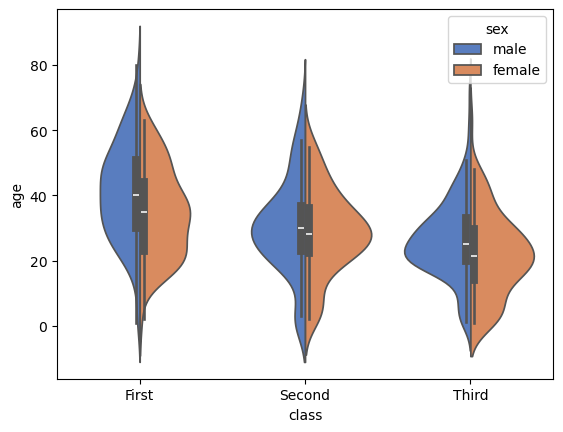

In [75]:
sns.violinplot(x="class", y="age", hue="sex", data=titanic, split=True, palette="muted")

### Stripplot (shows distribution with possible overlaps)
A strip plot is a type of categorical scatter plot used to display the distribution of individual data points for a given categorical variable. It is commonly used when the dataset is small or when it’s important to show all individual observations rather than summaries.



<Axes: xlabel='class', ylabel='age'>

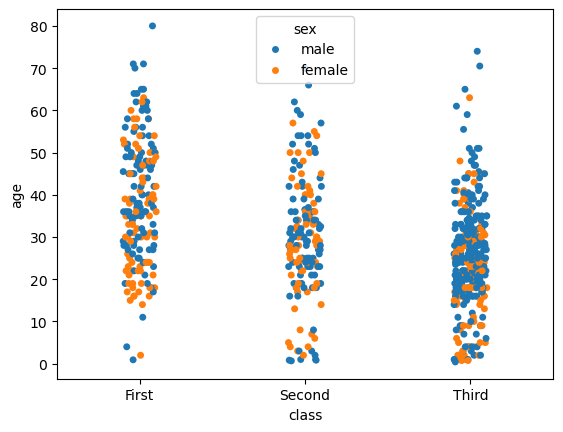

In [81]:
sns.stripplot(x="class", y="age", hue="sex", data=titanic)

### Swarmplot (like stripplot but avoids overlaps)
A swarm plot is a categorical scatter plot, similar to a strip plot, but with a key improvement: it adjusts the position of points along the categorical axis so that they do not overlap. This makes it easier to see the exact distribution of individual observations.



<Axes: xlabel='class', ylabel='age'>

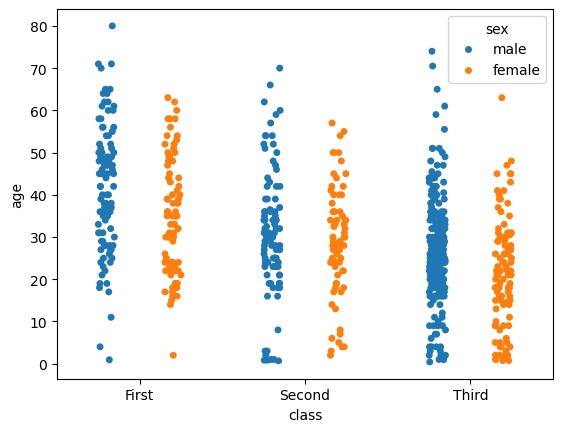

In [91]:
sns.stripplot(x="class", y="age", hue="sex", data=titanic, jitter=True, dodge=True)

### Heatmap 
A heatmap is a color-coded table that makes numerical relationships easy to interpret, especially for correlations or frequency distributions.

sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm")

<Axes: >

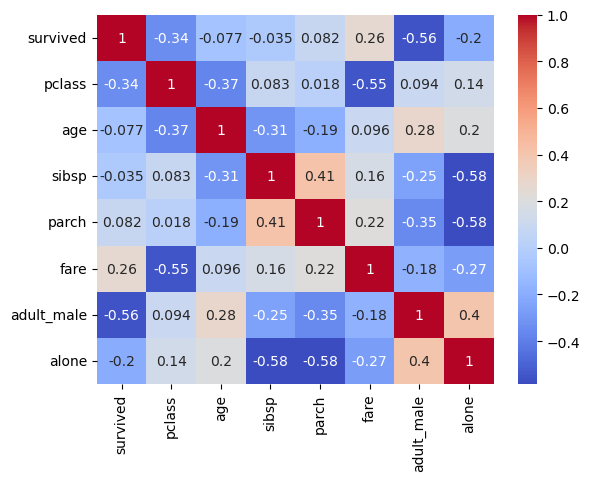

In [95]:
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm")


### Cluster Map 
A Cluster Map is very useful for EDA because it combines a heatmap with hierarchical clustering. It groups similar rows/columns together so patterns in correlations (or any matrix-like data) become clear.

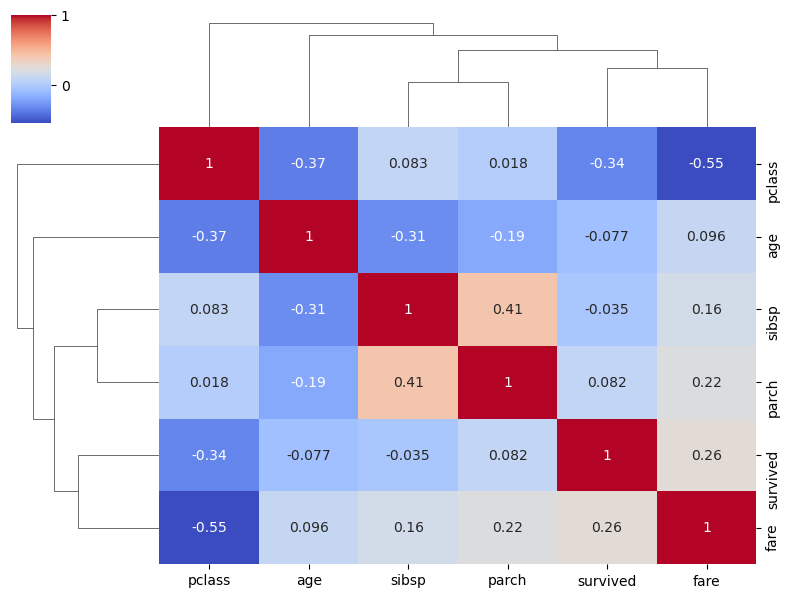

In [97]:
titanic_numeric = titanic.select_dtypes(include=["float64", "int64"])
corr = titanic_numeric.corr()

sns.clustermap(corr, annot=True, cmap="coolwarm", figsize=(8,6))



### Pairplot
A pair plot is a visualization that shows pairwise relationships between multiple numerical variables in a dataset. It is essentially a matrix of scatter plots where:Each cell in the matrix is a scatter plot of one variable vs another.
The diagonal usually shows the distribution of each variable (histogram or KDE).
sns.pairplot(titanic[["age", "fare", "survived", "pclass"]].dropna(), hue="survived")

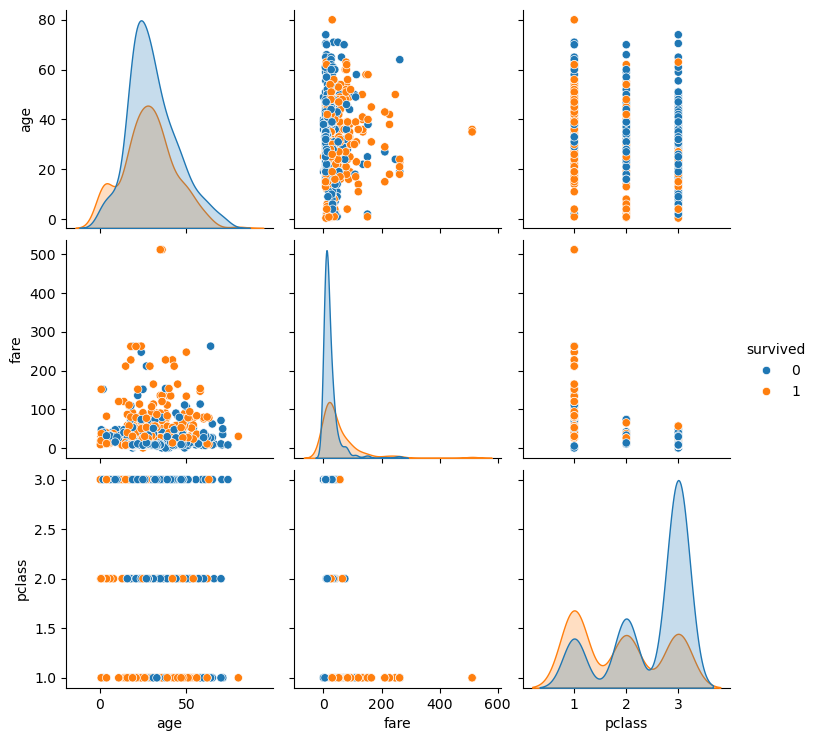

In [104]:
sns.pairplot(titanic[["age", "fare", "survived", "pclass"]].dropna(), hue="survived")
plt.show()

### Sub plot
A subplot allows you to display multiple plots in a single figure, arranged in a grid layout. This is very useful when comparing different variables, categories, or visualization types side by side.

C:\Users\priya\AppData\Local\Temp\ipykernel_39612\3082768140.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y="fare", data=titanic, ax=axes[0,1], palette="Set2")
C:\Users\priya\AppData\Local\Temp\ipykernel_39612\3082768140.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=titanic, ax=axes[1,0], palette="pastel")


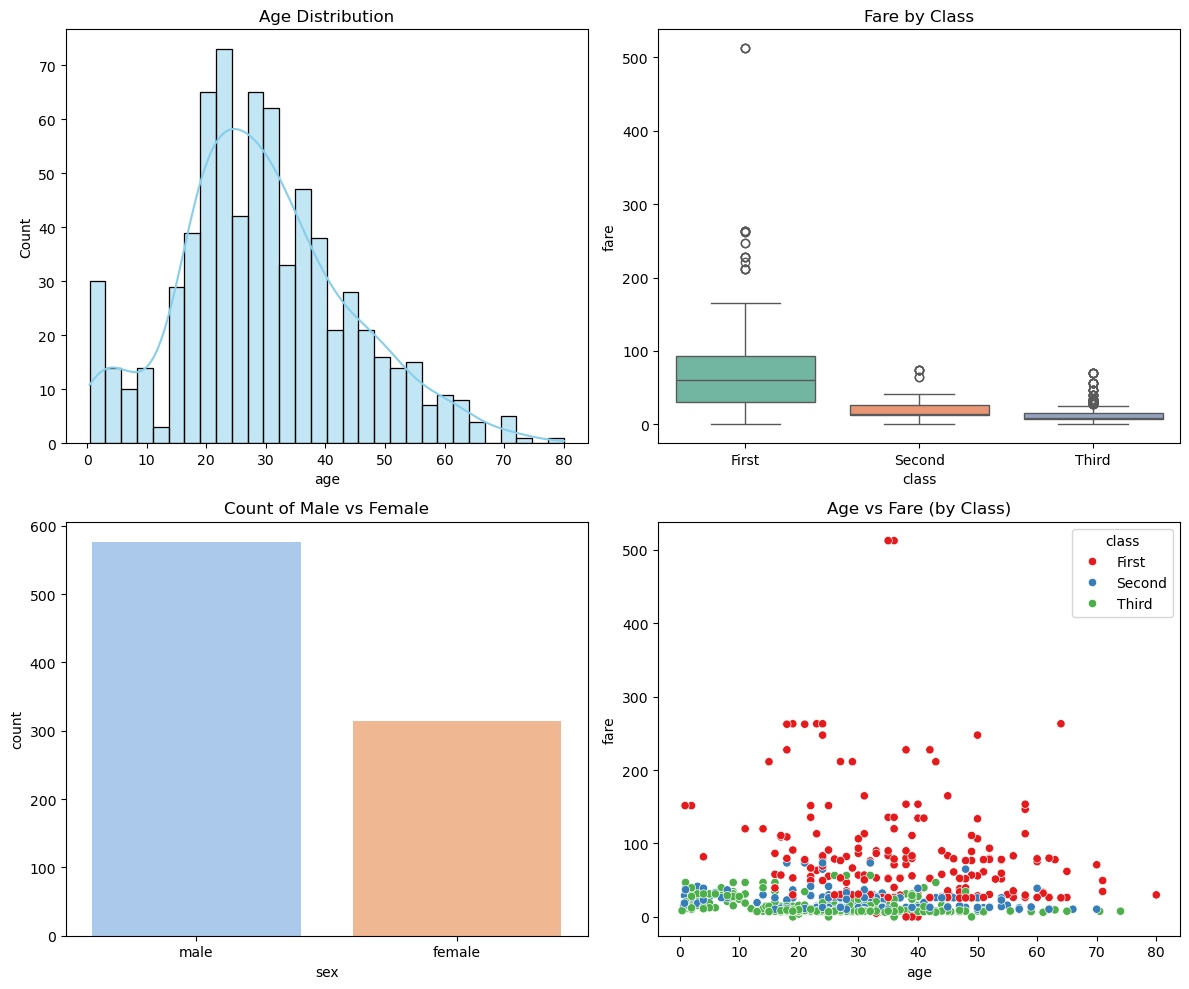

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Histogram of Age
sns.histplot(titanic["age"], kde=True, bins=30, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Age Distribution")

# 2. Boxplot of Fare by Class
sns.boxplot(x="class", y="fare", data=titanic, ax=axes[0,1], palette="Set2")
axes[0,1].set_title("Fare by Class")

# 3. Countplot of Gender
sns.countplot(x="sex", data=titanic, ax=axes[1,0], palette="pastel")
axes[1,0].set_title("Count of Male vs Female")

# 4. Scatter plot Age vs Fare
sns.scatterplot(x="age", y="fare", data=titanic, hue="class", ax=axes[1,1], palette="Set1")
axes[1,1].set_title("Age vs Fare (by Class)")

# Adjust layout
plt.tight_layout()
plt.show()


## 📈 Basic Matplotlib Visualizations

### Age Histogram

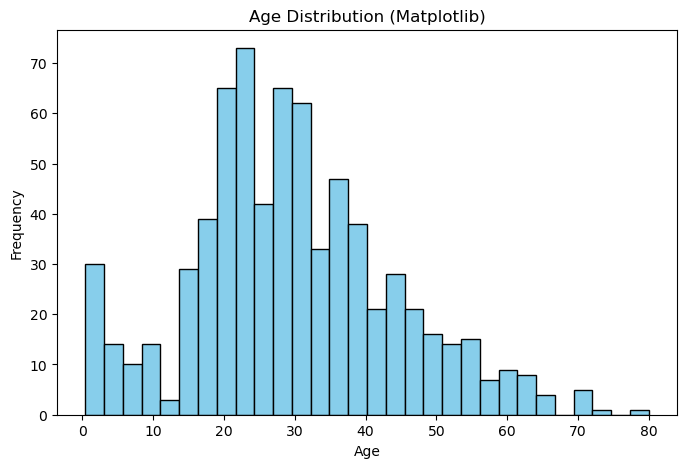

In [109]:
plt.figure(figsize=(8,5))
plt.hist(titanic['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Age Distribution (Matplotlib)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Survival Pie Chart

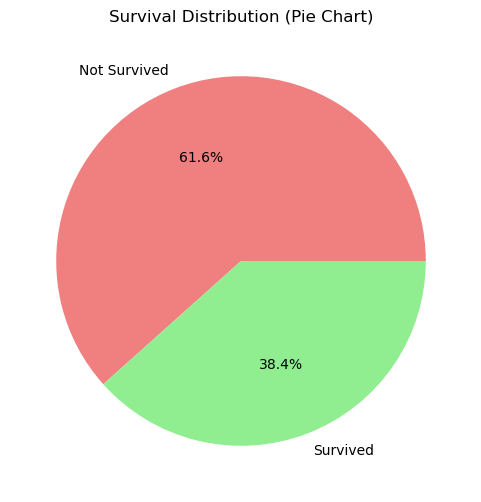

In [111]:
survival_counts = titanic['survived'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(survival_counts, labels=["Not Survived","Survived"], autopct='%1.1f%%', colors=["lightcoral","lightgreen"])
plt.title("Survival Distribution (Pie Chart)")
plt.show()

### Average Fare by Class (Bar Chart)

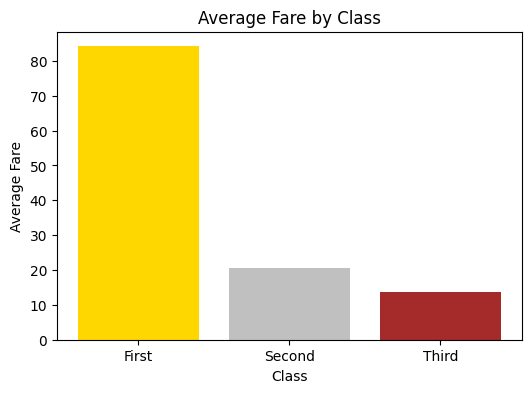

In [18]:
avg_fare = titanic.groupby("class")["fare"].mean()
plt.figure(figsize=(6,4))
plt.bar(avg_fare.index, avg_fare.values, color=["gold","silver","brown"])
plt.title("Average Fare by Class")
plt.xlabel("Class")
plt.ylabel("Average Fare")
plt.show()

### Line Plot of Fare vs Age

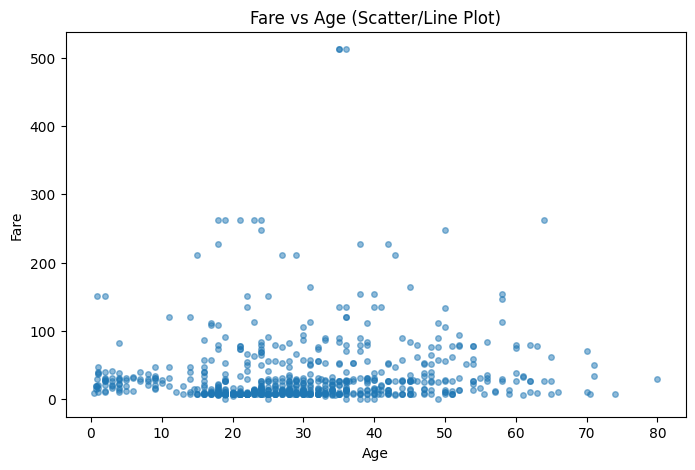

In [13]:
plt.figure(figsize=(8,5))
plt.plot(titanic["age"], titanic["fare"], "o", markersize=4, alpha=0.5)
plt.title("Fare vs Age (Scatter/Line Plot)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# 📊 Supermarket Sales Data Visualization

The growth of supermarkets in the most populated cities is increasing, and market competition is also high.  
The dataset provided is from one of the historical supermarket companies, containing sales records across **three different branches**.  

As a **Data Scientist**, the task is to analyze and visualize this dataset using different types of plots.

---

### 📂 Dataset Columns
- **Branch**  
- **City**  
- **Customer type**  
- **Gender**  
- **Unit price**  
- **Quantity**  
- **Tax (5%)**  
- **Total**  

---

### 📝 Dataset

| Branch | City       | Customer type | Gender | Unit price | Quantity | Tax 5%   | Total     |
|--------|-----------|---------------|--------|------------|----------|----------|-----------|
| A      | Yangon    | Member        | Female | 74.69      | 7        | 26.1415  | 548.9715  |
| C      | Naypyitaw | Normal        | Female | 15.28      | 5        | 3.82     | 80.22     |
| A      | Yangon    | Normal        | Male   | 46.33      | 7        | 16.2155  | 340.5255  |
| A      | Yangon    | Member        | Male   | 58.22      | 8        | 23.288   | 489.048   |
| A      | Yangon    | Normal        | Male   | 86.31      | 7        | 30.2085  | 634.3785  |
| C      | Naypyitaw | Normal        | Male   | 85.39      | 7        | 29.8865  | 627.6165  |
| A      | Yangon    | Member        | Female | 68.84      | 6        | 20.652   | 433.692   |
| C      | Naypyitaw | Normal        | Female | 73.56      | 10       | 36.78    | 772.38    |
| A      | Yangon    | Member        | Female | 36.26      | 2        | 3.626    | 76.146    |
| B      | Mandalay  | Member        | Female | 54.84      | 3        | 8.226    | 172.746   |
| B      | Mandalay  | Member        | Female | 14.48      | 4        | 2.896    | 60.816    |
| B      | Mandalay  | Member        | Male   | 25.51      | 4        | 5.102    | 107.142   |
| A      | Yangon    | Normal        | Female | 46.95      | 5        | 11.7375  | 246.4875  |
| A      | Yangon    | Normal        | Male   | 43.19      | 10       | 21.595   | 453.495   |
| A      | Yangon    | Normal        | Female | 71.38      | 10       | 35.69    | 749.49    |
| B      | Mandalay  | Member        | Female | 93.72      | 6        | 28.116   | 590.436   |
| A      | Yangon    | Member        | Female | 68.93      | 7        | 24.1255  | 506.6355  |

---

## 🔍 Visualization Tasks

1. **Line Plot** → Plot the line plot between `Unit price` and `Total`.  
2. **Scatter Plot** → Plot the scatter plot between `Unit price` and `Total`.  
3. **Linear Regression Plot** → Illustrate the linear relationship between `Unit price` and `Quantity`.  
4. **Bar Plot (Gender)** → Plot the number of **Male** and **Female** customers.  
5. **Bar Plot (Customer Type)** → Plot the number of **Member** and **Normal** customers.  
6. **Bar Plot (Average Unit Price by Gender)** → Plot the average `Unit price` of **Male** vs **Female** customers.  
7. **Box Plot (City-wise Unit Price)** → Show the distributions of `Unit price` across different cities.  
8. **Swarm Plot** → Visualize the relationship between **Customer type** (Member/Normal) and `Quantity`.  
9. **Violin Plot** → Visualize the relationship between **Customer type** and `Quantity` using a violin plot.  
10. **Subplots** → Combine outputs of **Swarm Plot (Task 8)** and **Violin Plot (Task 9)** into a single subplot layout.  

---


In [120]:
import pandas as pd

data = {
    "Branch": ["A","C","A","A","A","C","A","C","A","B","B","B","A","A","A","B","A"],
    "City": ["Yangon","Naypyitaw","Yangon","Yangon","Yangon","Naypyitaw","Yangon","Naypyitaw","Yangon","Mandalay","Mandalay","Mandalay","Yangon","Yangon","Yangon","Mandalay","Yangon"],
    "Customer type": ["Member","Normal","Normal","Member","Normal","Normal","Member","Normal","Member","Member","Member","Member","Normal","Normal","Normal","Member","Member"],
    "Gender": ["Female","Female","Male","Male","Male","Male","Female","Female","Female","Female","Female","Male","Female","Male","Female","Female","Female"],
    "Unit price": [74.69,15.28,46.33,58.22,86.31,85.39,68.84,73.56,36.26,54.84,14.48,25.51,46.95,43.19,71.38,93.72,68.93],
    "Quantity": [7,5,7,8,7,7,6,10,2,3,4,4,5,10,10,6,7],
    "Tax 5%": [26.1415,3.82,16.2155,23.288,30.2085,29.8865,20.652,36.78,3.626,8.226,2.896,5.102,11.7375,21.595,35.69,28.116,24.1255],
    "Total": [548.9715,80.22,340.5255,489.048,634.3785,627.6165,433.692,772.38,76.146,172.746,60.816,107.142,246.4875,453.495,749.49,590.436,506.6355]
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv("supermarket_sales.csv", index=False)
print("CSV file saved as supermarket_sales.csv")


CSV file saved as supermarket_sales.csv


<Axes: xlabel='Unit price', ylabel='Total'>

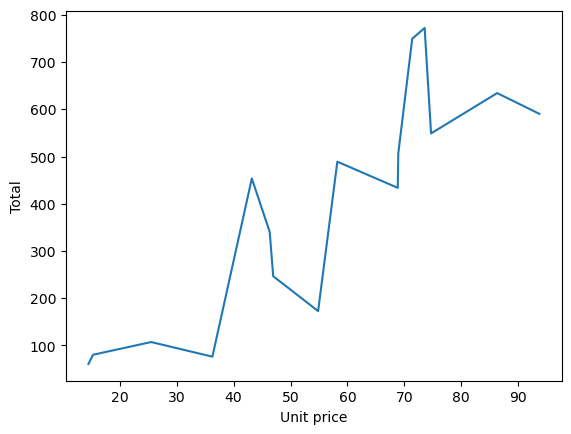

In [123]:
## Line Plot of Unit price and Total.
sns.lineplot(data=df,x='Unit price',y='Total')

<Axes: xlabel='Unit price', ylabel='Total'>

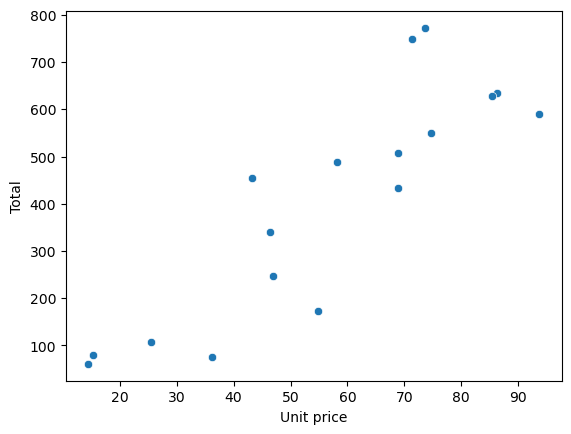

In [125]:
## Scatter Plot of Unit price and Total.
sns.scatterplot(data=df,x='Unit price',y='Total')

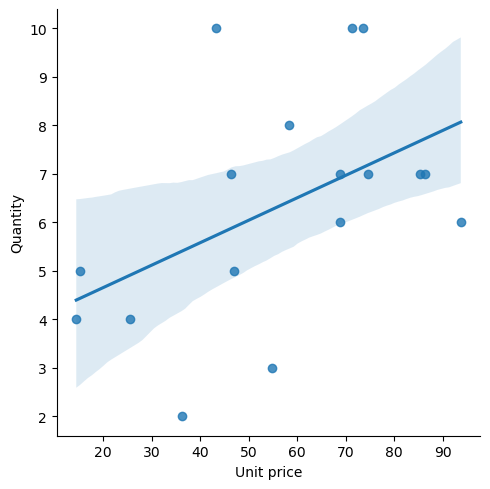

In [127]:
## Linear Regression Plot of Unit price and Quantity
sns.lmplot(data=df,x='Unit price',y='Quantity')

<Axes: xlabel='Gender', ylabel='count'>

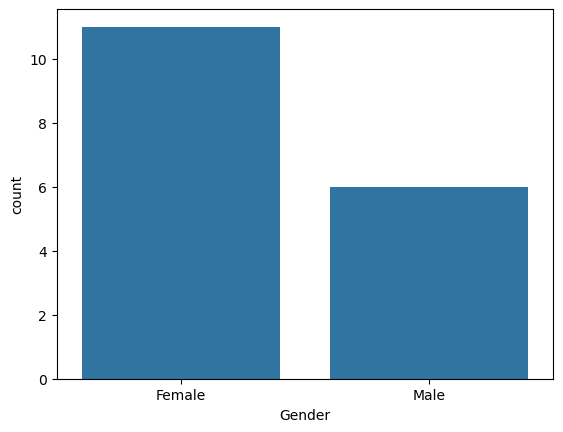

In [145]:
## Bar Plot for gender count
sns.countplot(x="Gender", data=df)


<Axes: xlabel='Customer type', ylabel='count'>

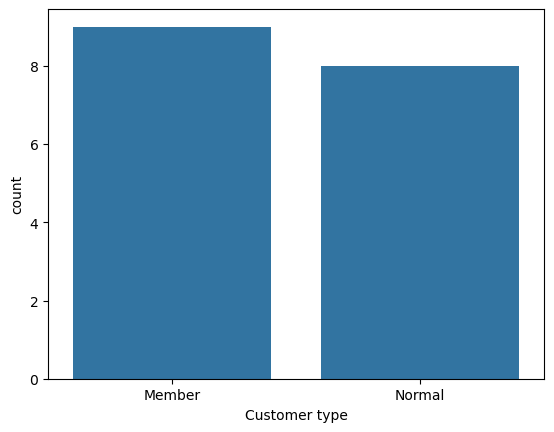

In [149]:
## Bar Plot for Customer Type count
sns.countplot(x="Customer type", data=df)

<Axes: xlabel='Gender', ylabel='Unit price'>

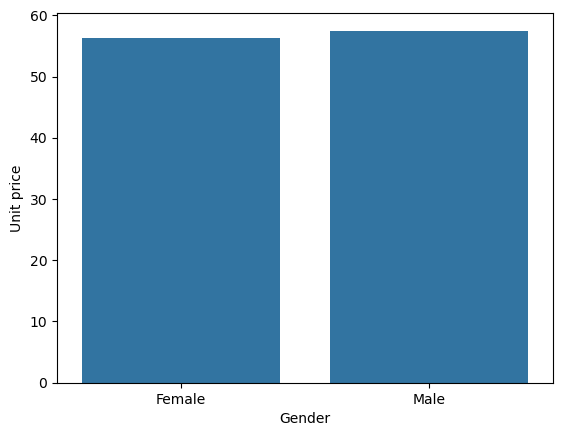

In [177]:
## Box plot for average Unit price of Male vs Female customers
avg_unit_price = df.groupby('Gender')['Unit price'].mean().reset_index()
sns.barplot(data=avg_unit_price, x='Gender',y='Unit price')

<Axes: xlabel='Customer type', ylabel='Quantity'>

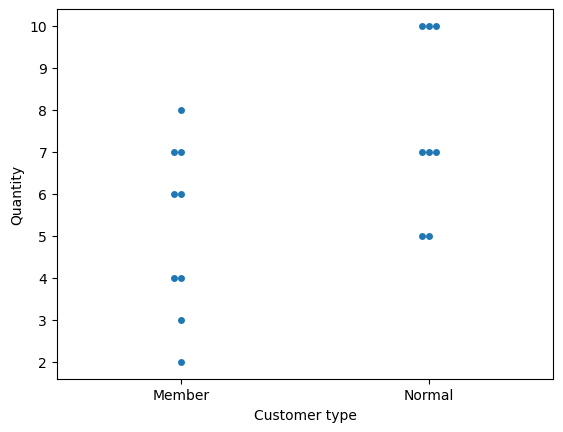

In [181]:
## Swarm plot for Customer type and quantity
sns.swarmplot(data=df,x='Customer type',y='Quantity')

<Axes: xlabel='Customer type', ylabel='Quantity'>

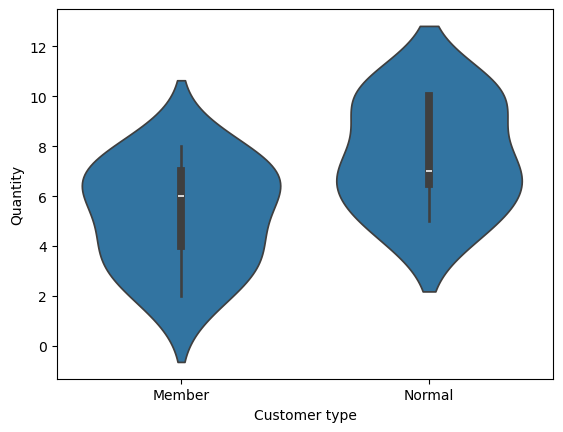

In [183]:
## Violin plot for Customer type and quantity
sns.violinplot(data=df,x='Customer type',y='Quantity')

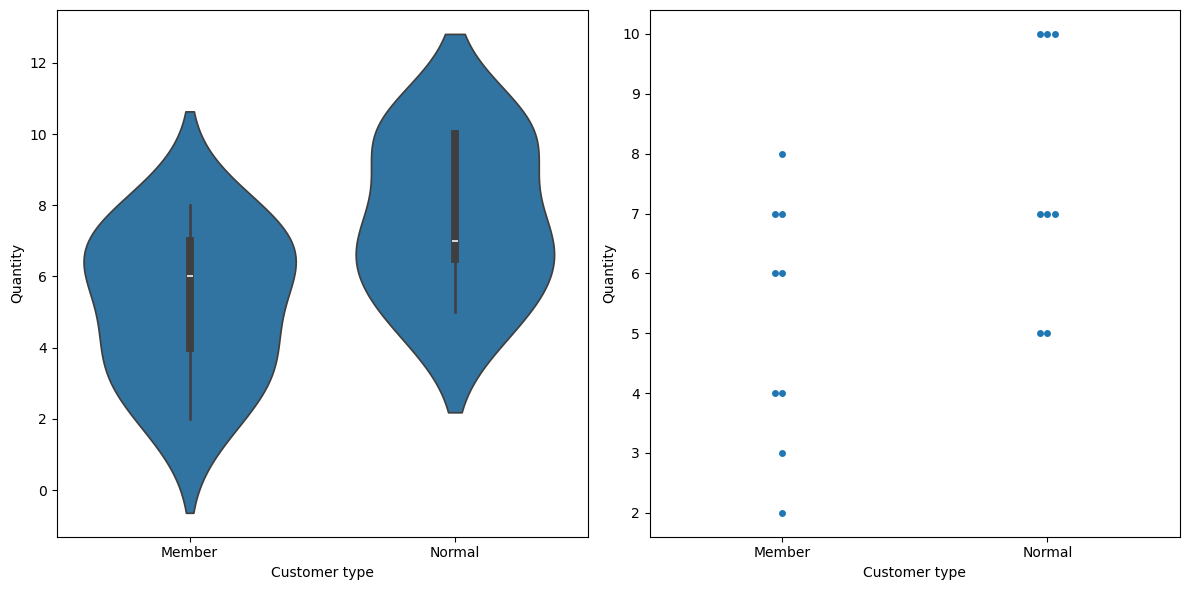

In [221]:
## Combine outputs of Swarm Plot (Task 8) and Violin Plot (Task 9) into a single subplot layout.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.violinplot(data=df,x='Customer type',y='Quantity', ax=axes[0])
sns.swarmplot(data=df,x='Customer type',y='Quantity', ax=axes[1])
plt.tight_layout()
plt.show()